# Lab Week 9: Decision Trees and Random Forests

In this lab you'll train a decision tree classifier and a random forest classifier. You'll do so on both synthetic and real data.

**Run the code cell below** to import the required packages.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree        # For DecisionTreeClassifier class
import sklearn.ensemble    # For RandomForestClassifier class
import sklearn.datasets    # For make_circles
import sklearn.metrics     # For accuracy_score

**Run the code below** to download the data

In [2]:
!gdown 1TGWK4rkZDFEoZ1xys5AoslzmZ3_1jT8p
!gdown 1qzYvf-ME_kQHkrPnCRMI5MJhFrvNAOvZ

Downloading...
From: https://drive.google.com/uc?id=1TGWK4rkZDFEoZ1xys5AoslzmZ3_1jT8p
To: /content/data_test.csv
100% 731/731 [00:00<00:00, 2.67MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qzYvf-ME_kQHkrPnCRMI5MJhFrvNAOvZ
To: /content/data_train.csv
100% 831/831 [00:00<00:00, 2.85MB/s]


<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 1. Fitting a Random Forest classifier to synthetic data

Exercises 1.1&ndash;1.4 ask you to apply scikit-learn's decision tree classifier (**[sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**) and random forest classifier (**[sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**) to synthetic data.

**Run the code cell below** to define some useful functions for plotting data and predictions.

In [3]:
def plot_data(X, y):
    """Plots a toy 2D data set. Assumes values in range [-3,3] and at most 3 classes."""
    plt.plot(X[y==0,0], X[y==0,1], 'ro', markersize=6)
    plt.plot(X[y==1,0], X[y==1,1], 'bs', markersize=6)
    plt.plot(X[y==2,0], X[y==2,1], 'gx', markersize=6, markeredgewidth=2)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.gca().set_aspect('equal')

def plot_predict(model):
    """
    Plots the model's predictions over all points in range 2D [-3, 3].
    Assumes at most 3 classes.
    """
    extent = (-3, 3, -3, 3)
    x1min, x1max ,x2min, x2max = extent
    x1, x2 = np.meshgrid(np.linspace(x1min, x1max, 100), np.linspace(x2min, x2max, 100))
    X = np.column_stack([x1.ravel(), x2.ravel()])
    y = model.predict(X).reshape(x1.shape)
    cmap = matplotlib.colors.ListedColormap(['r', 'b', 'g'])
    plt.imshow(y, extent=extent, origin='lower', alpha=0.4, vmin=0, vmax=2, cmap=cmap, interpolation='nearest')
    plt.xlim([x1min, x1max])
    plt.ylim([x2min, x2max])
    plt.gca().set_aspect('equal')

def plot_class_probability(model, class_index):
    """
    Plots the model's class probability for the given class {0,1,2}
    over all points in range 2D [-3, 3]. Assumes at most 3 classes.
    """
    extent = (-3, 3, -3, 3)
    x1min, x1max ,x2min, x2max = extent
    x1, x2 = np.meshgrid(np.linspace(x1min, x1max, 100), np.linspace(x2min, x2max, 100))
    X = np.column_stack([x1.ravel(), x2.ravel()])
    p = model.predict_proba(X)[:,class_index].reshape(x1.shape)
    colors = [[1, 0, 0], [0, 0, 1], [0, 1, 0]]
    cmap = matplotlib.colors.ListedColormap(np.linspace([1, 1, 1], colors[class_index], 50))
    plt.imshow(p, extent=extent, origin='lower', alpha=0.4, vmin=0, vmax=1, cmap=cmap)
    plt.xlim([x1min, x1max])
    plt.ylim([x2min, x2max])
    plt.gca().set_aspect('equal')

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.1 &mdash; Train and inspect a small decision tree (2 points, 2 classes)

Read the documentation for the *DecisionTreeClassifier*'s **[fit](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit)** method. Notice that the $y$ vector should contain integer class labels.
You are asked to build the small 2D training set below:

$$
X = \begin{bmatrix}
-1 & 0\\
 1 & 0
\end{bmatrix},
\quad
y = \begin{bmatrix}
0\\
1
\end{bmatrix}
$$



**Write a few lines of code** to
1. Define the training set above in two variables $X$ and $y$.
2. Train a decision tree classifier on $X$ and $y$. Use argument *random_state*=0.
3. Plot the decision tree predictions and the data (use *plot_predict* and *plot_data* from preamble).
4. Plot the decision tree itself (use **[sklearn.tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)**); pass `feature_names=['x1', 'x2']` as an argument.

You should end up with a plot showing the data and the decision surface between classes 0 (red) and class 1 (blue). You should see a binary decision tree diagram depicting a tree of height 1 that splits the feature space using the first variable (`x1`) at threshold 0.

*Tip 1:* If you want a single code cell to generate multiple figures, call `plt.figure()` to tell Matplotlib that you want the subsequent plotting commands to generate a new, separate figure from any previous plotting commands.

*Tip 2:* If the last line of your code cell returns a value, it will be printed as the `Out` of the cell before the plots are shown. Some times you don't care about this 'final' value, for example if it is a string or some object you don't need printed. If you want to suppress the cell's `Out` value, add a semicolon (`;`) to the end of the last line of code in the cell.

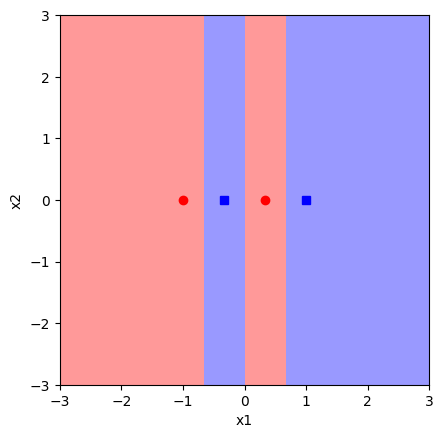

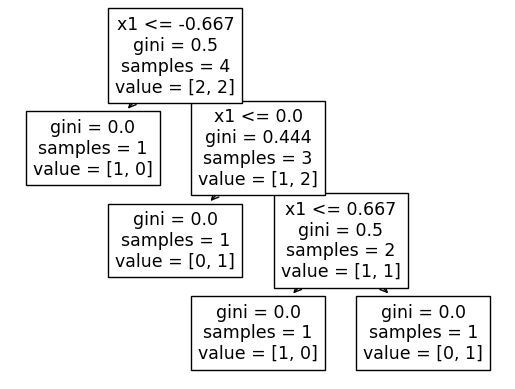

In [4]:
# Your code here. Aim for 7-9 lines.

X = np.array([[-1, 0],
              [1, 0],
              [-1/3, 0],
              [1/3, 0]])
y = np.array([0, 1, 1, 0])
clf = sklearn.tree.DecisionTreeClassifier(random_state=0)
clf.fit(X, y)
plt.figure()  # this figure is for plotting
plot_predict(clf)
plot_data(X, y)
plt.figure()  #  this one is for plotting the decision tree
sklearn.tree.plot_tree(clf, feature_names=['x1', 'x2']);

Once you have things working, **add two data points** to your training set:
* $\mathbf{x}_3 = (-\frac{1}{3}, 0)$ with class label $y_3=1$ (blue), and
* $\mathbf{x}_4 = (\frac{1}{3}, 0)$ with class label $y_4=0$ (red).

**Re-run your code cell above** and make sure you understand how the splits and thresholds you see in the tree correspond to the decision region shown.

*Note:* If a decision tree node is shown as having *value*=[1,2], it means that node's region (before splitting) contains exactly one training point from class 0 and two training points from class 1. The root note thus 'contains' the entire training set.

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.2 &mdash; Train and inspect a small decision tree (3 points, 3 classes)

**Repeat Exercise 1.1** but with the following changes:
1. To the original $\mathbf{x}_1$ and $\mathbf{x}_2$, add a third training point $\mathbf{x}_3 = (0, -2)$ with class label $y_3=2$.
2. Print the **[feature_importances_](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)** attribute of your trained decision tree. Intuitively, the feature importance is 0.0 if a feature is not used at all, or 1.0 if it is the only feature needed to make decisions.

This time you should see a binary decision tree of height 2, where the first split is done by thresholding the second feature (`X[1]`) and the second split is done by thresholding the first feature (`X[0]`). If a node has *value*=[1,1,0], it means that node's region (say, the red+blue region) contains exactly one training point from class 0, one training point from class 1, and zero training points from class 2.

3. Try incrementing *random_state* from 0 up to 9. How many distinct decision trees did you observe? Do the 'feature importances' make intuitive sense, given the trees that you observed?

Answer for Part 3:
- randon state = 0 - 8
  - Trees with a feature importance of [0.5, 0.5], which means they use both x1 and x2 features for splitting
- randon state = 9
  - A tree with a feature importance of [1.0, 0.0], using only the x1 feature

- The feature_importances_ do make intuitive sense when considering that:

  - If the dataset can be split perfectly by using just one feature, that feature will have higher importance.
  - If the decision boundaries are such that both features are required to split the dataset effectively, both will have equal importance.

Feature importances: [0.5 0.5]

Random state = 0 => Feature importance: [0.5 0.5]
Random state = 1 => Feature importance: [0.5 0.5]
Random state = 2 => Feature importance: [0.5 0.5]
Random state = 3 => Feature importance: [0.5 0.5]
Random state = 4 => Feature importance: [0.5 0.5]
Random state = 5 => Feature importance: [0.5 0.5]
Random state = 6 => Feature importance: [0.5 0.5]
Random state = 7 => Feature importance: [0.5 0.5]
Random state = 8 => Feature importance: [0.5 0.5]
Random state = 9 => Feature importance: [1. 0.]


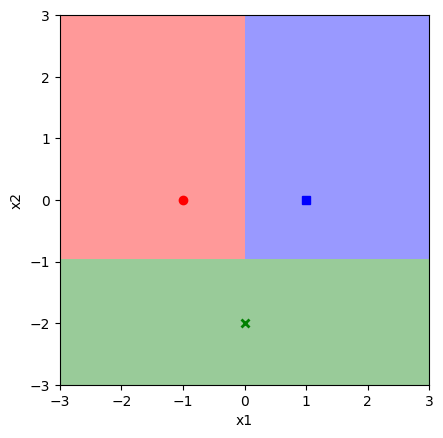

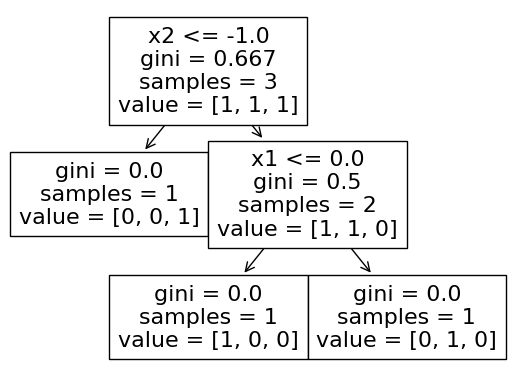

In [5]:
# Your code here. Aim for 9-11 lines.
X = np.array([[-1, 0],[1, 0],[0, -2]])
y = np.array([0, 1, 2])
clf = sklearn.tree.DecisionTreeClassifier(random_state=0)
clf.fit(X, y)
plt.figure()  # this figure is for plotting
plot_predict(clf)
plot_data(X, y)
plt.figure()  # this one is for plotting the decision tree
sklearn.tree.plot_tree(clf, feature_names=['x1', 'x2']);
print(f"Feature importances: {clf.feature_importances_}\n")

# part 3
for random_state in range(10):
    clf = sklearn.tree.DecisionTreeClassifier(random_state=random_state)
    clf.fit(X, y)
    print(f"Random state = {random_state} => Feature importance: {clf.feature_importances_}")

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.3 &mdash; Train and inspect a small random forest (3 points, 3  classes)

The goal of this exercise is to show you how a random forest is a collection of decision trees.

**Repeat Exercise 1.2** but this time train using a random forest classifier (**[sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**) on the same 3-point data set. Use *random_state*=0 and *n_estimators*=3. You should see a decision region that still has axis-aligned boundaries, but different from Exercise 1.2.

Feature importances: [0.625 0.375]


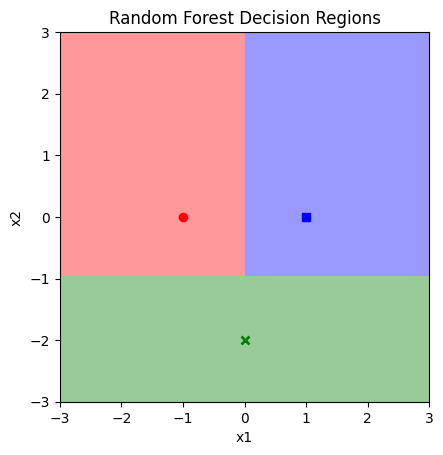

In [6]:
# Your code here. Aim for 9-11 lines. (OK to paste your data set building code from Exercise 1.2.)
X = np.array([[-1, 0], [1, 0], [0, -2]])
y = np.array([0, 1, 2])
forest = sklearn.ensemble.RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X, y)
plt.figure()  # this figure is for plotting
plot_predict(forest)
plot_data(X, y)
plt.title('Random Forest Decision Regions')
print(f"Feature importances: {forest.feature_importances_}")

A random forest builds multiple decision trees where each decision tree (each 'estimator') is trained on a different "re-samplings" of the training data. Specifically, decision tree $j$ is trained on a new training set $\mathcal{D}_j$ that is built by sampling $N$ pairs $(\mathbf{x}_i, y_i)$ from the original $N$ training examples in $\mathcal{D}$. The sampling is done "with replacement," meaning that the new training set $\mathcal{D}_j$ may contain duplicates and/or be missing some of the original data.

With the *random_state* you have chosen, the three re-samplings of $\mathcal{D}=\{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), (\mathbf{x}_3, y_3) \}$ are:
* $\mathcal{D}_1 = \{(\mathbf{x}_1, y_1), (\mathbf{x}_1, y_1), (\mathbf{x}_3, y_3) \}$ (red, red, green).
* $\mathcal{D}_2 = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), (\mathbf{x}_2, y_2) \}$ (red, red, blue).
* $\mathcal{D}_3 = \{(\mathbf{x}_2, y_2), (\mathbf{x}_2, y_2), (\mathbf{x}_3, y_3) \}$ (blue, blue, green).

Each individual decision tree is not a good classifier.
To make a prediction, the random forest collects a prediction from each tree, and returns the class with the most "votes." The winner of these votes tends to be a good classification.

**Plot the decision region and decision tree** for each of the three decision trees that comprise the random forest. Read about the *estimators_* attribute in the [*RandomForestClassifier* documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Your answer should use a for-loop *over the estimators*, generating a plot for each one. Your code should generate three figures, where each figure contains two subplots (use Matplotlib's [subplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html) function). Your first pair should look like this:


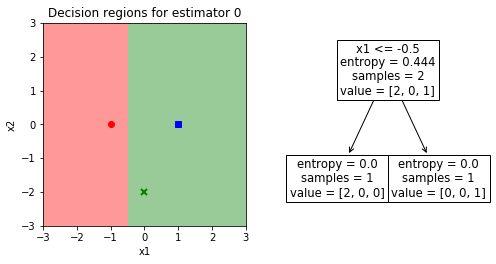

*Hint:* Remember to use `plt.figure()` to start a new figure. Pass argument `figsize=(8,4)` to the *figure* function to make a figure that's twice as wide as it is tall.

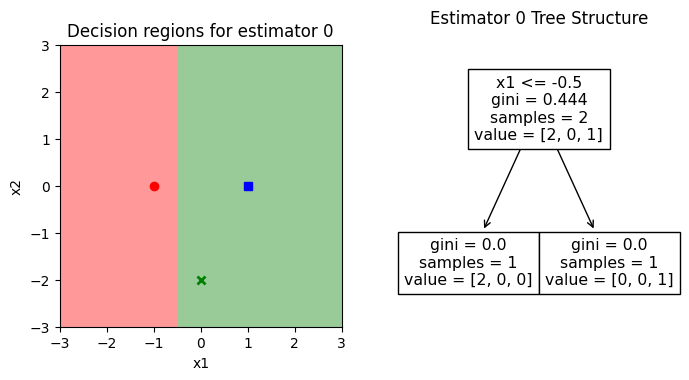

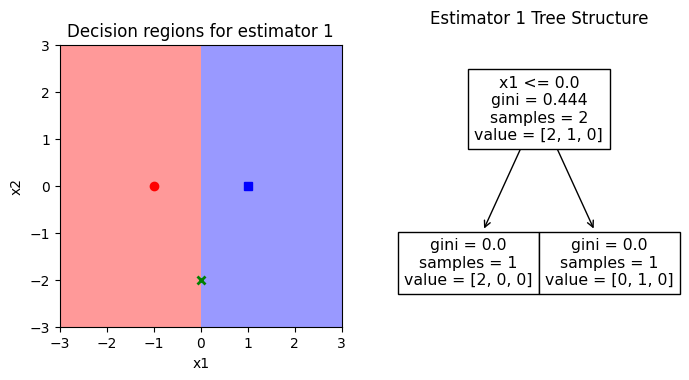

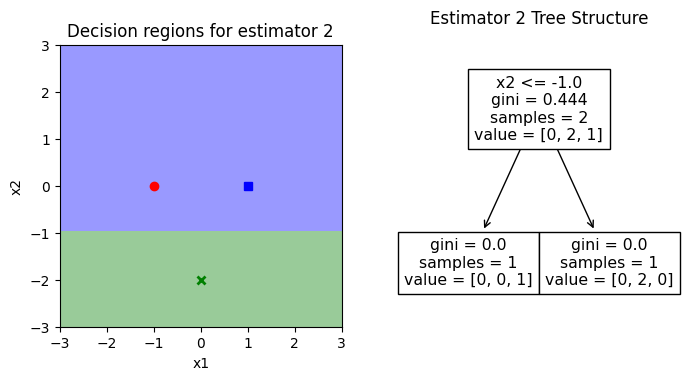

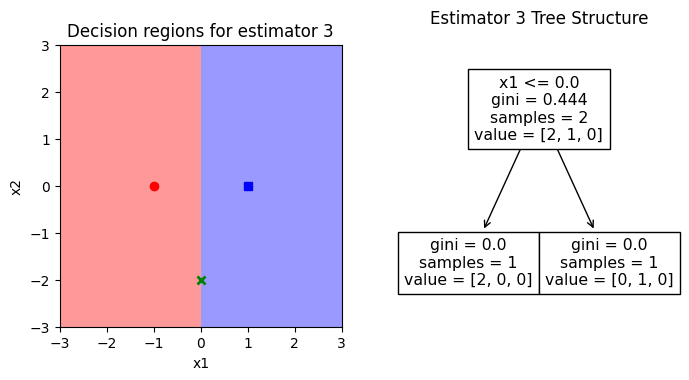

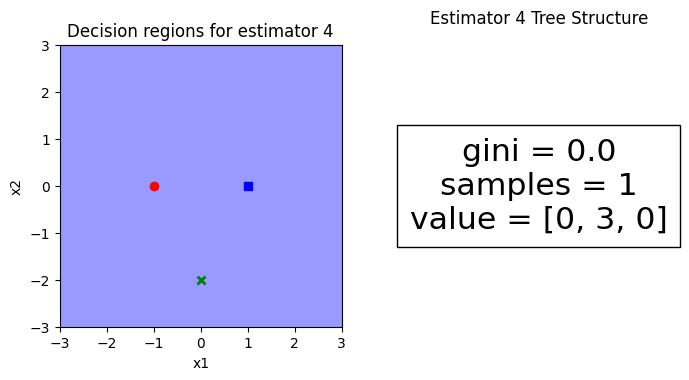

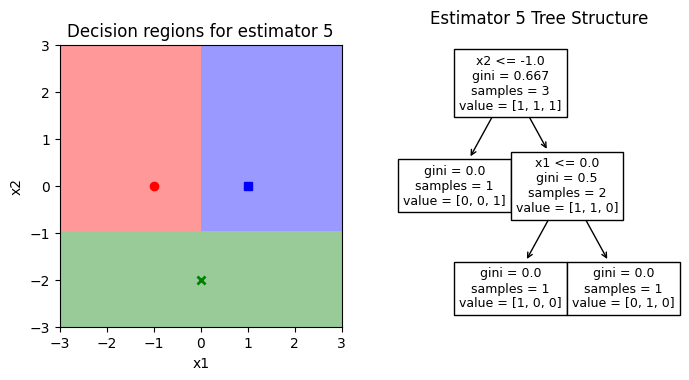

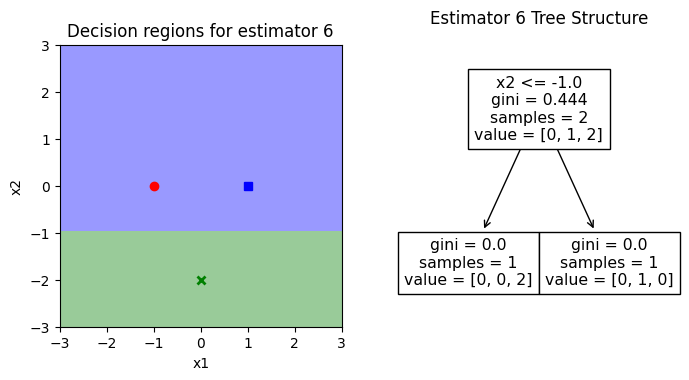

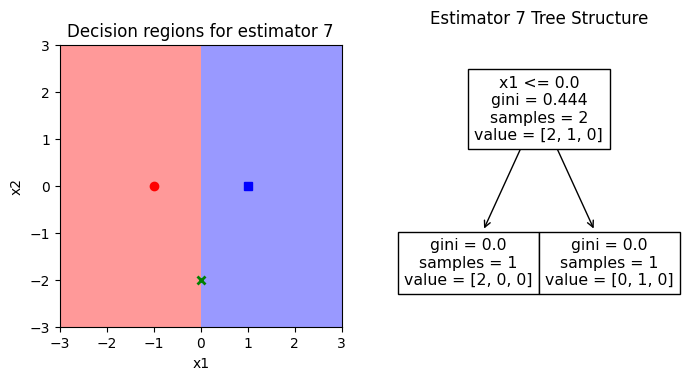

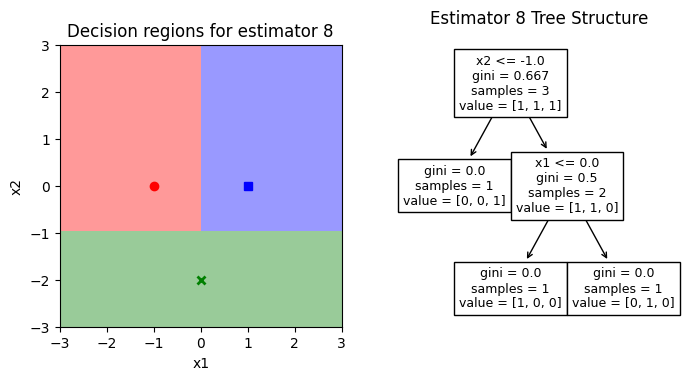

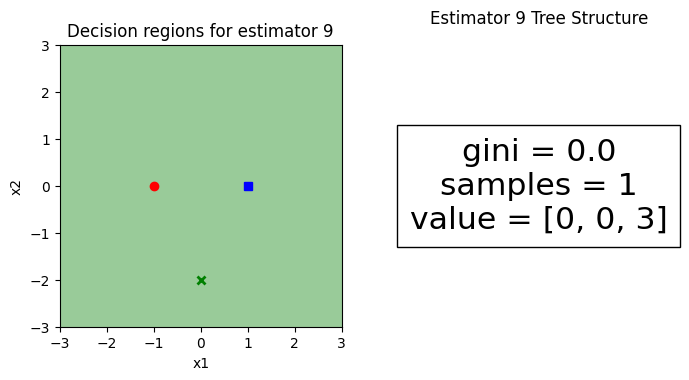

In [7]:
# Your plotting loop here. Aim for 8-10 lines.
forest = sklearn.ensemble.RandomForestClassifier(n_estimators=10, random_state=0).fit(X, y)

for i, tree in enumerate(forest.estimators_):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plot_predict(tree)
    plot_data(X, y)
    plt.title(f'Decision regions for estimator {i}')
    plt.subplot(1, 2, 2)
    sklearn.tree.plot_tree(tree, feature_names=['x1', 'x2'])
    plt.title(f'Estimator {i} Tree Structure')


Each of the above trees 'votes' to determine the final class for every point in input space. The next step asks you to visualize how the "votes" from these trees add up and contribute to "class probabilities."

**Plot the class probabilities** reported by the *RandomForestClassifier* instance that you trained. Use Matplotlib's *figure*, *subplot*, and *colorbar* functions to create a single figure with three rows (one per class). For each subplot, use the *plot_class_probability* function (see preamble) to plot the heatmap of probablities. (This function calls *RandomForestClassifier*'s **[predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba)** method). Your plot should look like this, but with the probabilities filled in:



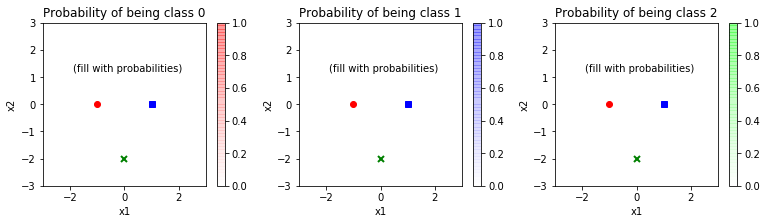

It's important not to confuse the number of trees with the number of classes, which in this case are both three.

*Tip:* As the figure you need to generate has three subplots in a row, I suggest setting *figsize=(13,3)*.

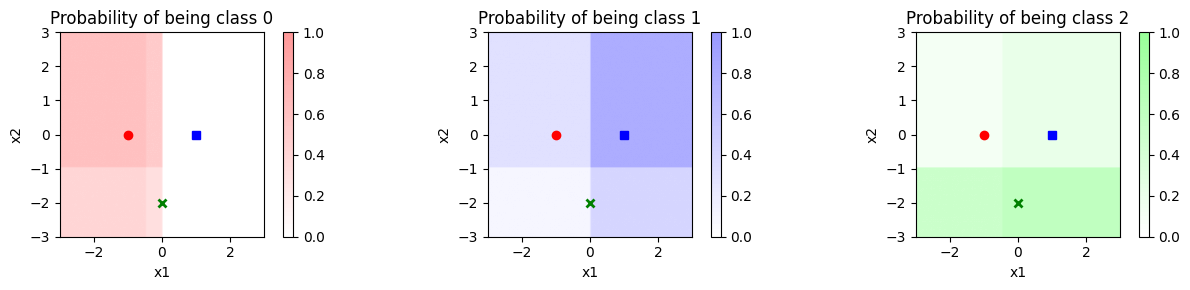

In [8]:
# Your code here. Aim for 7-8 lines.
plt.figure(figsize=(13, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plot_class_probability(forest, i)
    plot_data(X, y)
    plt.colorbar()
    plt.title(f'Probability of being class {i}')
plt.tight_layout()
plt.show()

It is important to understand how the decision tree predictions lead to these probabilities. Inspect the shape of the decision regions proposed by each individual decision tree, and then ensure that you understand their correspondence with the class probabilities above.

Finally, once you understand how the three decision trees are combined, **re-run all code cells of Exercise 1.3** but use *n_estimators=10* so that there are now 10 decision trees. Notice how the final class probabilities change.

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.4 &mdash; Train and inspect a small random forest on a synthetic pattern

You are asked to train a random forest classifier on a synthetic binary classification data set. Use the **[sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)** function to create two concentric circles.

**Write a few lines of code** to:
1. Generate the circle data, with each circle made from 10 points. Use *random_state*=0.
2. For each *n_estimators* in $\{1, 2, 4, 8, 16, 32, 64\}$, train a random forest (use *random_state*=0) and plot its decision regions.

You first plot should look like this:




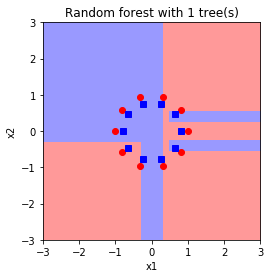

You should see a progression, where as the predictions from "more trees" are averaged together, the resulting decision regions tend to be better.

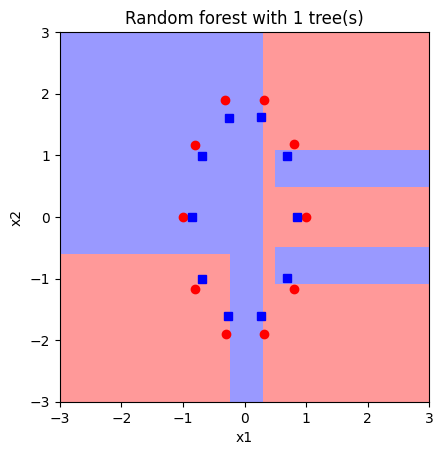

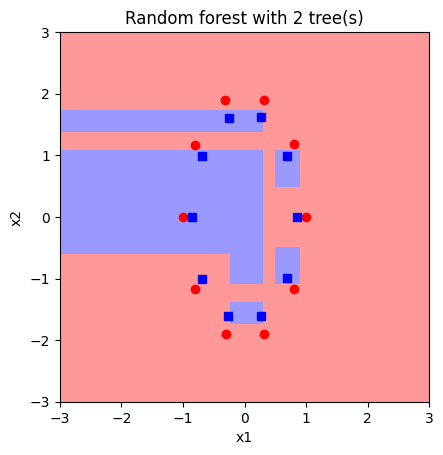

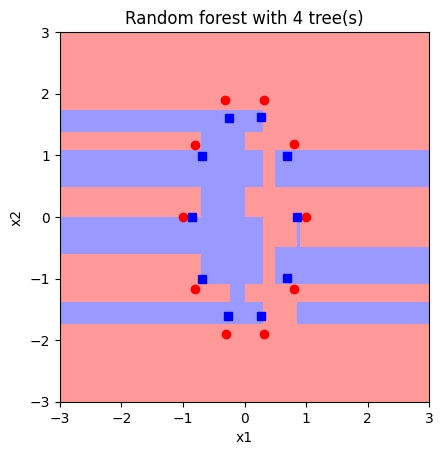

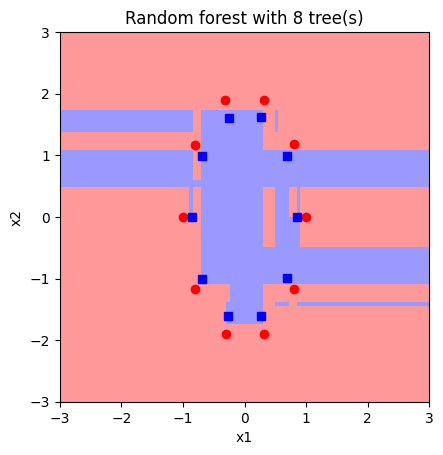

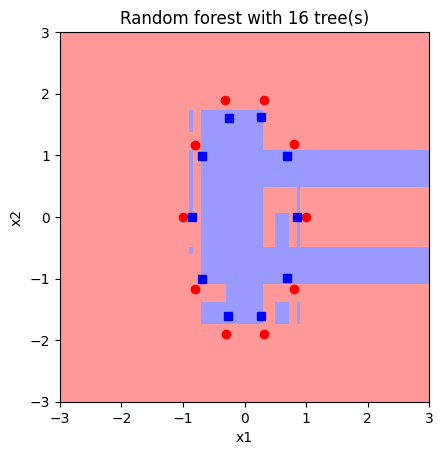

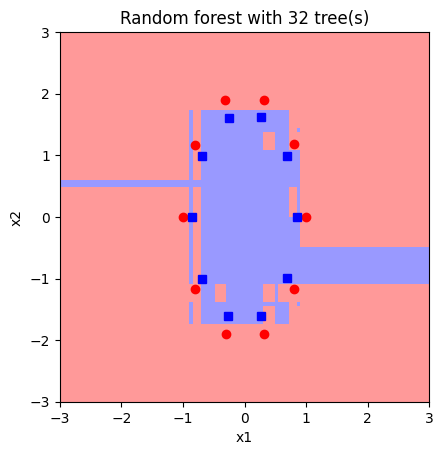

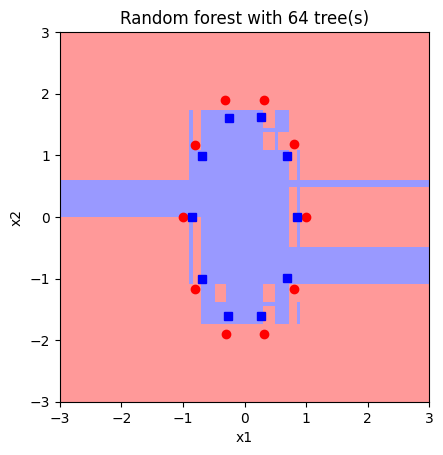

In [9]:
# Your code here. Aim for 8-10 lines.
X, y = sklearn.datasets.make_circles(n_samples=20, factor=0.85, noise=0.001, random_state=0)
X[:, 1] = X[:, 1] * 2
n_estimators_list = [1, 2, 4, 8, 16, 32, 64]
clf = None
for n_estimators in n_estimators_list:
    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    clf.fit(X, y)
    plt.figure()
    plot_predict(clf)
    plot_data(X, y)
    plt.title(f'Random forest with {n_estimators} tree(s)')

**Plot the class probabilities** of the final random forest (the one with *n_estimators*=64) using the *plot_class_probability* function. You should generate one figure with two subplots, each with a colour bar, similar to Exercise 1.3. Your figure should look like this (but with probabilities filled):

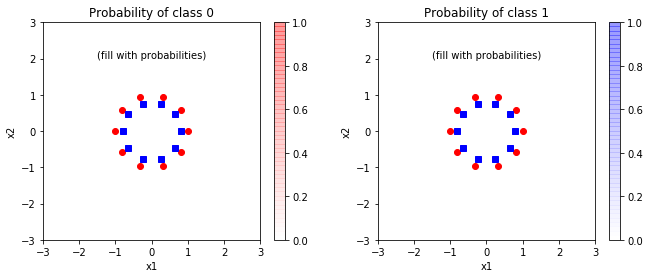

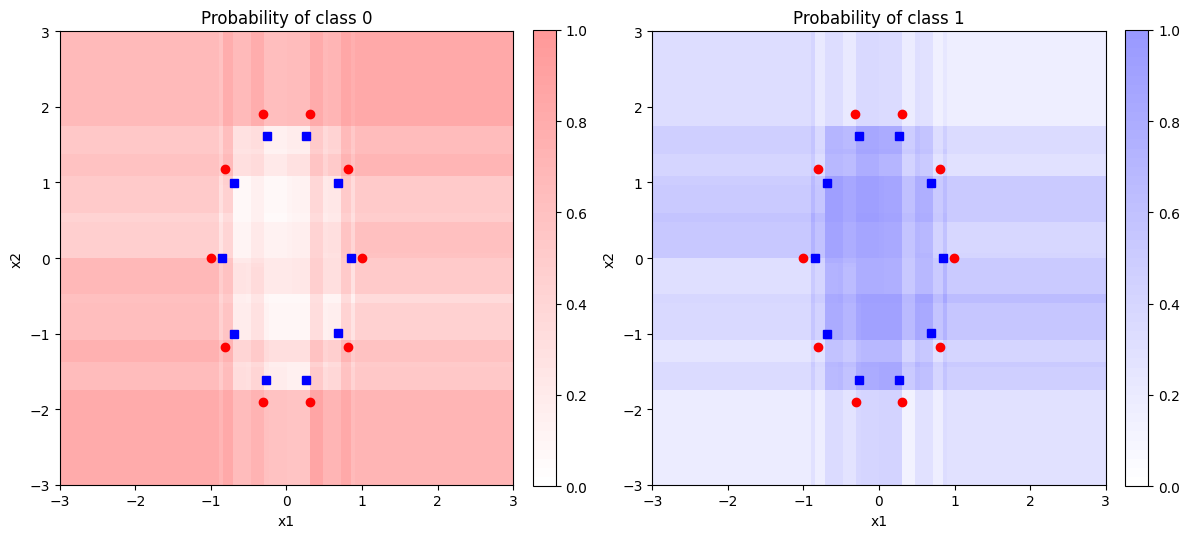

In [10]:
# Your code here. Aim for 7-9 lines.
plt.figure(figsize=(12, 6))
for i in range(2):
    ax = plt.subplot(1, 2, i + 1)
    probability_contour = plot_class_probability(clf, i)
    plot_data(X, y)
    plt.title(f'Probability of class {i}')
    plt.colorbar(probability_contour, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()

Notice how even though the decision region is compacy, the class probabilities have axis-aligned structure extending far away from the data.

Finally, **scale the second feature by a factor of two and re-run all code cells of Exercise 1.4**. You can scale the second feature by multiplying the second column in you $X$ matrix by $2$. You should see your circle vertically stretched.

After seeing all the results, make note of whether the decision regions simply scaled with the data or whether the decision regions qualitatively changed in any way.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
*Observation*: The decision regions are vertically stretched and show qualitative changes, adapting to the new scale of the data. When the feature is scaled, the decision boundaries also scale, but the way they partition the space shifts, reflecting the model's adaptation to the new relative distances between data points






<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 2. Fitting a Random Forest classifier to real data

Exercises 2.1&ndash;2.5 ask you to train and evaluate decision tree and random forest classifiers across multiple hyperparameters on real data.

<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.1 &mdash; Load data from a CSV file and plot it

In this exercise you'll be loading the **[data_train.csv](data_train.csv)** and **[data_test.csv](data_test.csv)** files accompanying this lab. Here's a preview of the training data file:
```
sepal_length,sepal_width,label
4.9,2.4,1
4.8,3.0,0
5.1,3.3,0
7.7,3.0,2
6.2,2.8,2
...
```
This is part of the classic [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set).
The first two comman-separated columns are features. They encode characteristics of flowers. The last column is the class label, where each integer represents one of *Iris Setosa* (0), *Iris Versicolour* (1), and *Iris Virginica*.

**Write a few lines of code** to load each CSV file from disk. From the first file you should create variables *X_train* and *y_train* to refer to the training features (float64) and training labels (int32) respectively. From the second file you should likewise create variables *X_test* and *y_test*. Use the **[np.loadtxt](https://numpy.org/devdocs/reference/generated/numpy.loadtxt.html)** function to load the CSV like you did in Lab 4.

In [11]:
# Your code here. Aim for 6-8 lines.

# Load the training data
data_train = np.loadtxt('data_train.csv', delimiter=',', skiprows=1, dtype='float64')
X_train = data_train[:, :-1]
y_train = data_train[:, -1].astype('int32')

# Load the test data
data_test = np.loadtxt('data_test.csv', delimiter=',', skiprows=1, dtype='float64')
X_test = data_test[:, :-1]
y_test = data_test[:, -1].astype('int32')

**Check your answer** by running the code cell below.

In [12]:
assert 'X_train' in globals(), "No X_train variable!"
assert 'y_train' in globals(), "No y_train variable!"
assert 'X_test' in globals(), "No X_test variable!"
assert 'y_test' in globals(), "No y_test variable!"
assert isinstance(X_train, np.ndarray)
assert isinstance(y_train, np.ndarray)
assert isinstance(X_test, np.ndarray)
assert isinstance(y_test, np.ndarray)
assert X_train.shape == (80,2), "X_train was wrong shape!"
assert X_train.dtype in (np.float32, np.float64), "X_train was wrong data type!"
assert y_train.shape == (80,), "y_train was wrong shape!"
assert y_train.dtype == np.int32, "y_train was wrong data type!"
assert X_test.shape == (70,2), "X_test was wrong shape!"
assert X_test.dtype in (np.float32, np.float64), "X_test was wrong data type!"
assert y_test.shape == (70,), "y_test was wrong shape!"
assert y_test.dtype == np.int32, "y_test was wrong data type!"
print("Correct!")

Correct!


**Plot the training and testing data** by completing the plotting code below, much like you did in Exercise 2.1 of Lab 4. When you run the code cell it will generate two figures, and the first one should look like this:


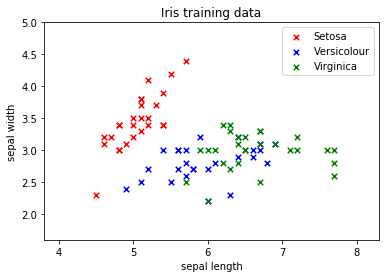

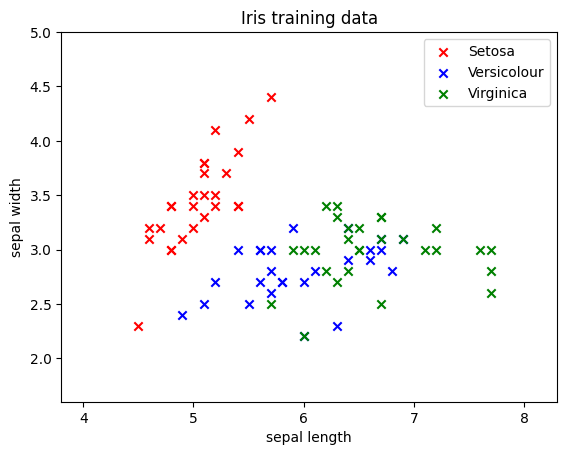

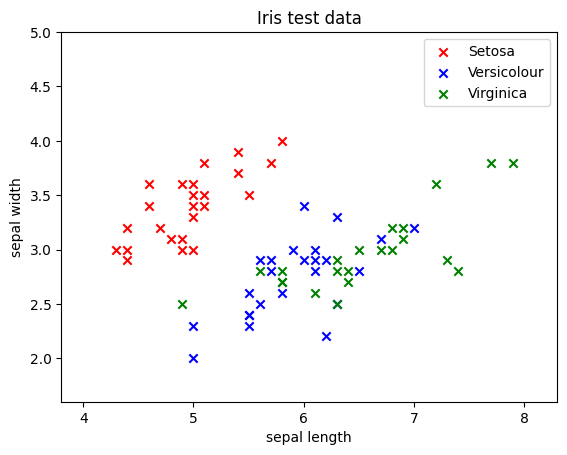

In [13]:
iris_extent = (3.8, 8.3, 1.6, 5)   # A good (x1min, x1max, x2min, x2max) for plotting iris data

def plot_iris_data(X, y, title):
    # Your plotting code here. Aim for 3 lines, plus a few for labels/title/legend/limits.
    colors = ['red', 'blue', 'green']
    labels = ['Setosa', 'Versicolour', 'Virginica']
    for i in range(3):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=colors[i], marker='x', label=labels[i])
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.title(title)
    plt.legend()
    plt.axis(iris_extent)

plt.figure()
plot_iris_data(X_train, y_train, 'Iris training data')

plt.figure()
plot_iris_data(X_test, y_test, 'Iris test data')

<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.2 &mdash; Train a decision tree on the Iris data and plot it

You must train a decision tree on the Iris training data, and plot the decision regions. Your final result should look like this:


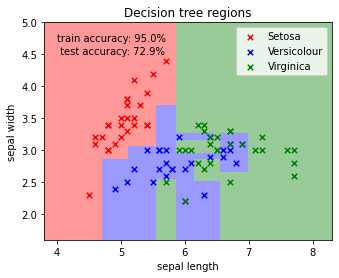


**Write a few lines of code** to:
1. Train a *DecisionTreeClassifier* object on the training data.
2. Plot the resulting predictor. Use *random_state*=0.
3. Add text to your plot showing the accuracy of the classifier when predicting on the training data and when predicting on the held-out test data. Use the **[sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)** function and Matplotlib's **[text](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)** function.

For plotting, you cannot use the *plot_predict* function from Exercise 1 because it assumes extents (-3, 3, -3, 3), but you can adapt that code to work for the range of Iris data below.

*Tip:* When you are formatting a string like `"%.1f" % accuracy` and you want to add a `%` symbol to the string, use two `%%` symbols in a row as in `"%.1f%%" % accuracy`. This lets Python know not to expect a second value to substitute into the string, and to just print `%` in that spot.

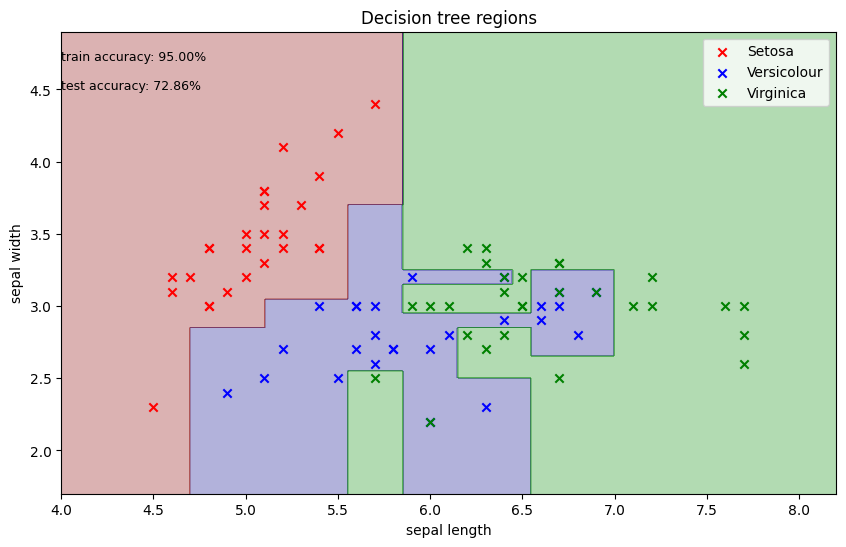

In [40]:
def plot_iris_predict(model, ax):
    x_min, x_max = 3.8, 8.3
    y_min, y_max = 1.6, 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    cmap = matplotlib.colors.ListedColormap(['#880000', '#000088', '#008800'])
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('sepal length')
    ax.set_ylabel('sepal width')

# Your training, plotting, and evaluation code here. Aim for 7-9 lines.
clf = sklearn.tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
train_accuracy = sklearn.metrics.accuracy_score(y_train, clf.predict(X_train))
test_accuracy = sklearn.metrics.accuracy_score(y_test, clf.predict(X_test))

fig, ax = plt.subplots(figsize=(10, 6))
plot_iris_predict(clf, ax)
plot_iris_data(X_train, y_train, 'Iris training data')

ax.text(4, 4.7, f"train accuracy: {train_accuracy:.2%}", fontsize=9)
ax.text(4, 4.5, f"test accuracy: {test_accuracy:.2%}", fontsize=9)
ax.set_title('Decision tree regions');

**Plot the decision tree** using the *plot_tree* function. You'll need to use the *figure* function with *figsize*=(16,16) in order to make the figure large enough to see all the details. Remember the hint about ending a line with a semicolon (`;`).


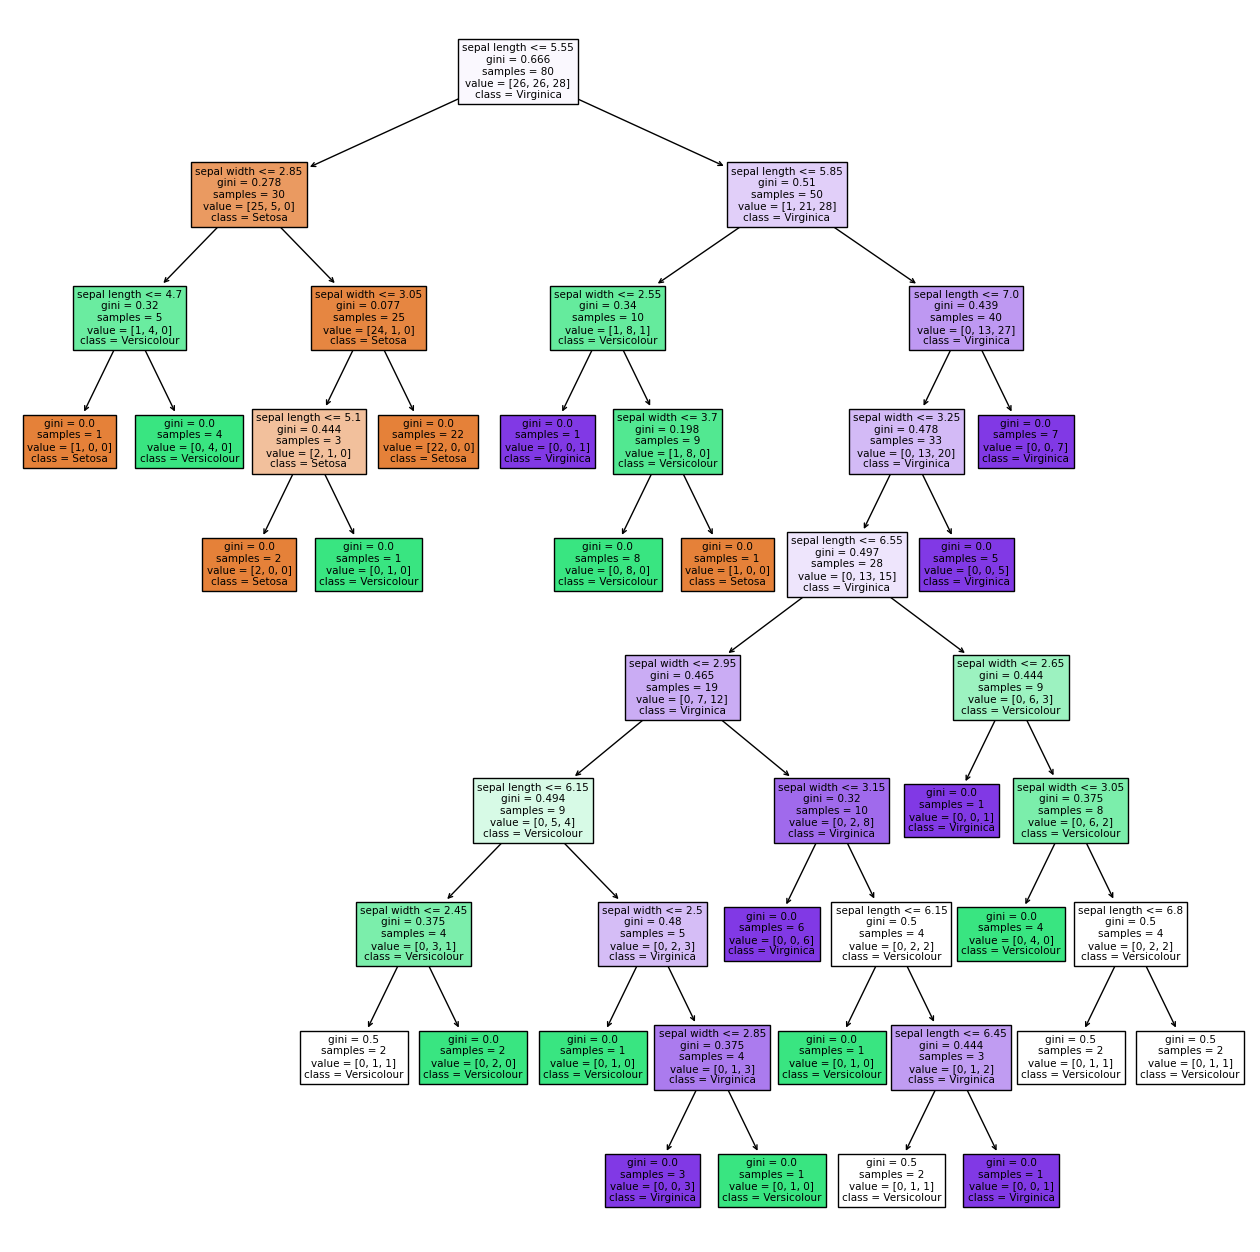

In [30]:
# Your code here. Aim for 2 lines.
plt.figure(figsize=(16, 16))
sklearn.tree.plot_tree(clf, filled=True, feature_names=['sepal length', 'sepal width'], class_names=['Setosa', 'Versicolour', 'Virginica']);

<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.3 &mdash; Train decision trees of different depths

You are asked to train multiple decision trees, each with a different *max_depth* parameter, and plot the resulting decision regions and training/test accuracy. The maximum depth of a decision tree controls how finely the tree is allowed to split the feature space before it must predict a class label. A depth of 1 means it is only allowed one split. Your first figure should look like this:


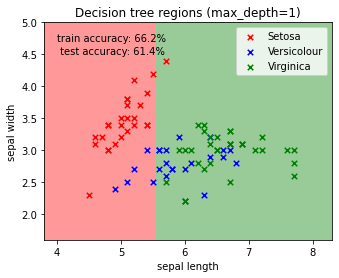



**Write a few lines of code** to create nine figures: one for each value of *max_depth* $\in \{1, \ldots, 9\}$. Use a for-loop in your answer. On each iteration, train a new classifier using *random_state*=0. Use the *plot_iris_data* and your *plot_iris_predict* functions.

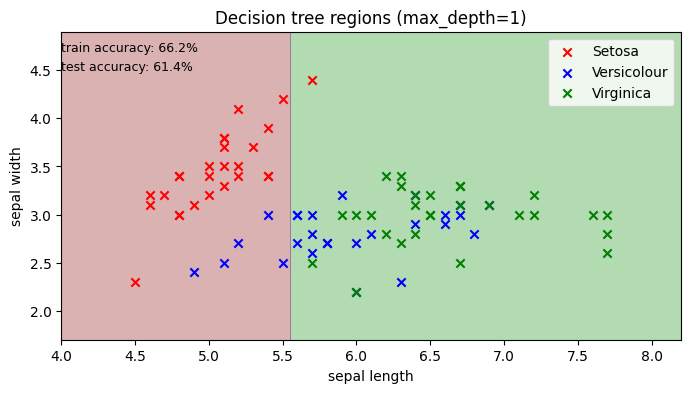

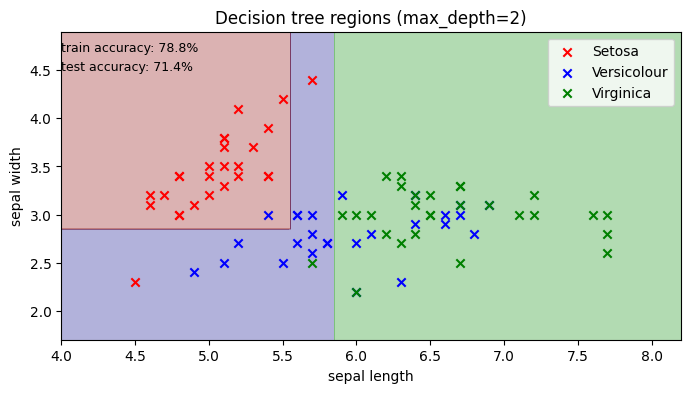

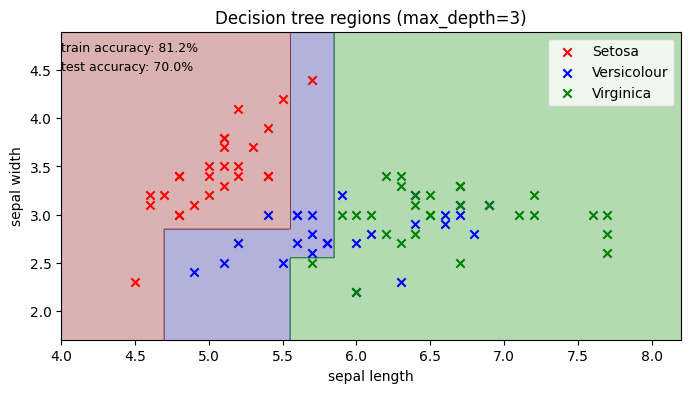

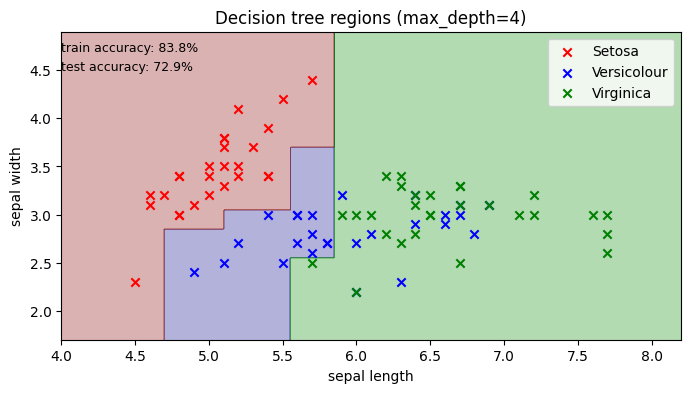

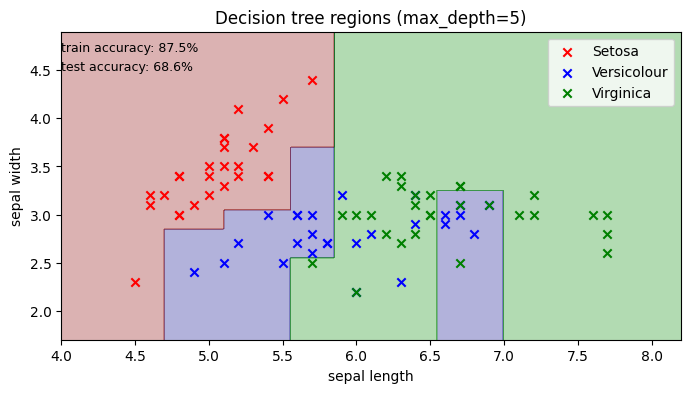

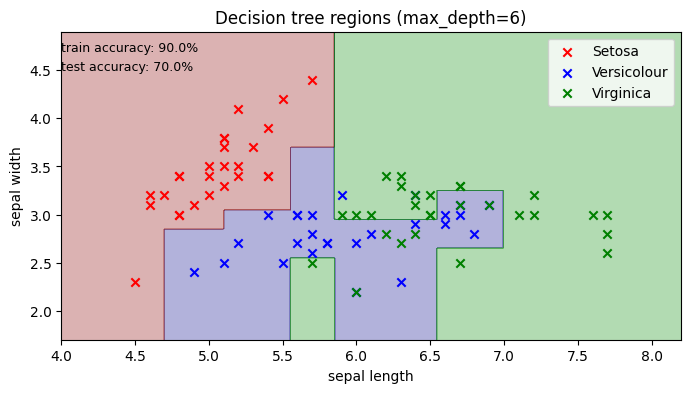

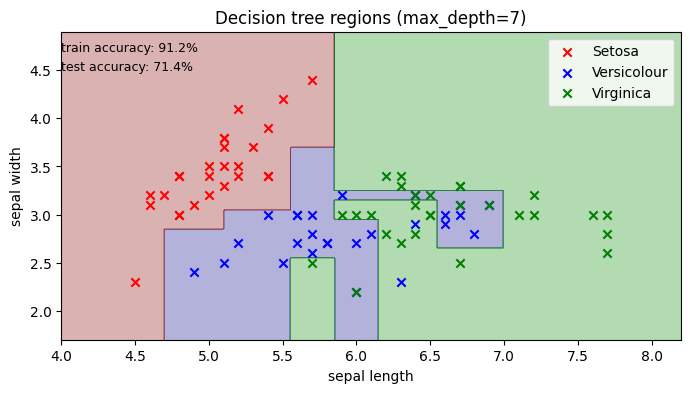

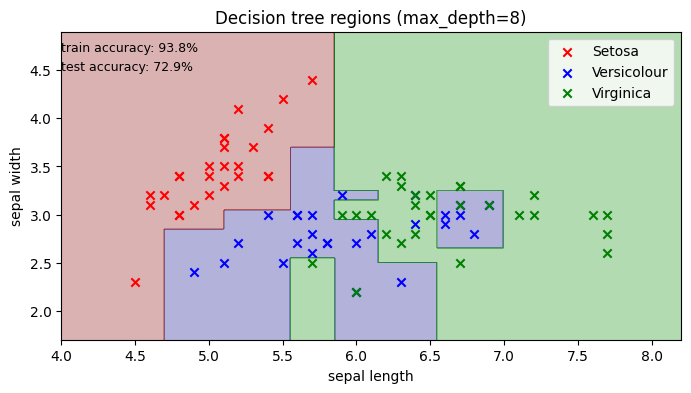

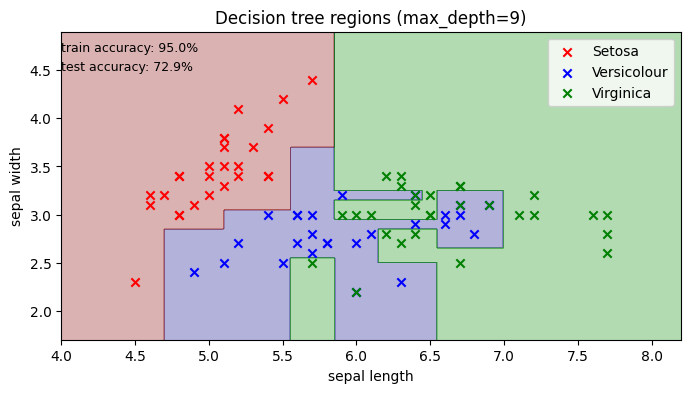

In [32]:
# Your code here. Aim for 9-12 lines.
for depth in range(1, 10):
    clf = sklearn.tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)

    train_accuracy = sklearn.metrics.accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = sklearn.metrics.accuracy_score(y_test, clf.predict(X_test))

    fig, ax = plt.subplots(figsize=(8, 4))
    plot_iris_predict(clf, ax)
    plot_iris_data(X_train, y_train, f'Decision tree regions (max_depth={depth})')

    plt.text(4, 4.7, f"train accuracy: {100*train_accuracy:.1f}%", fontsize=9)
    plt.text(4, 4.5, f"test accuracy: {100*test_accuracy:.1f}%", fontsize=9)
    plt.title(f'Decision tree regions (max_depth={depth})');

What happens to the training accuracy as *max_depth* increases? What is the maximum test accuracy of a decision tree classifier on this data set?

<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.4 &mdash; Train random forests of different depths

**Repeat Exercise 2.3** but this time train a *RandomForestClassifier* instead of a *DecisionTreeClassifier*. Use *random_state*=0 and *n_estimators*=100.

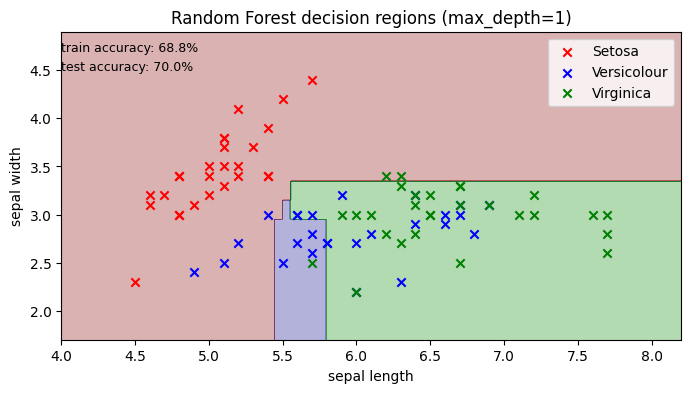

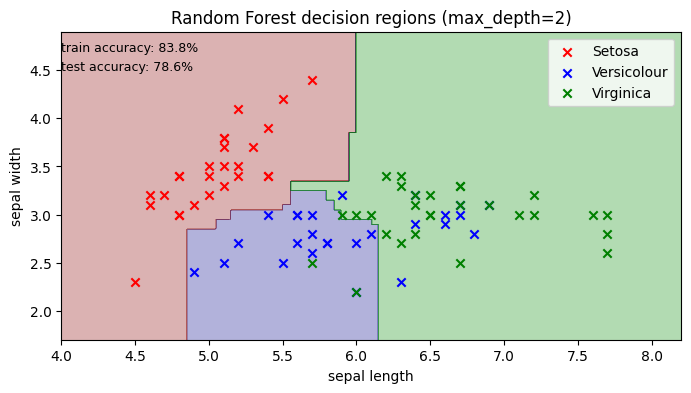

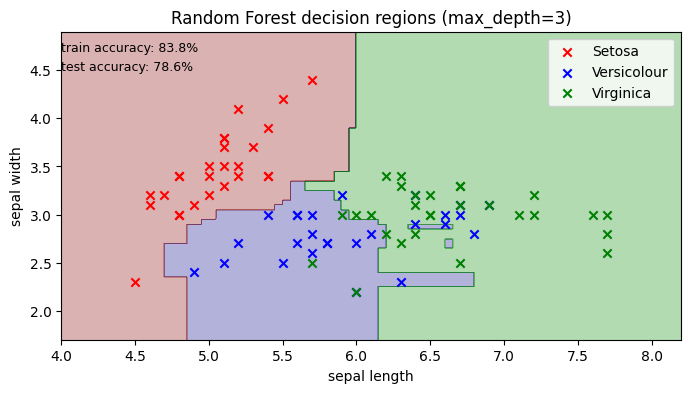

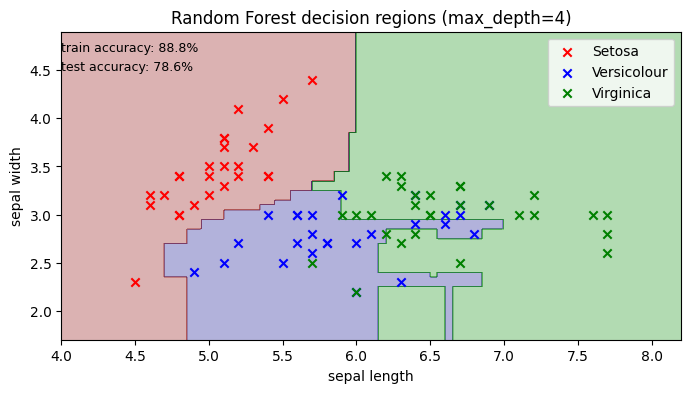

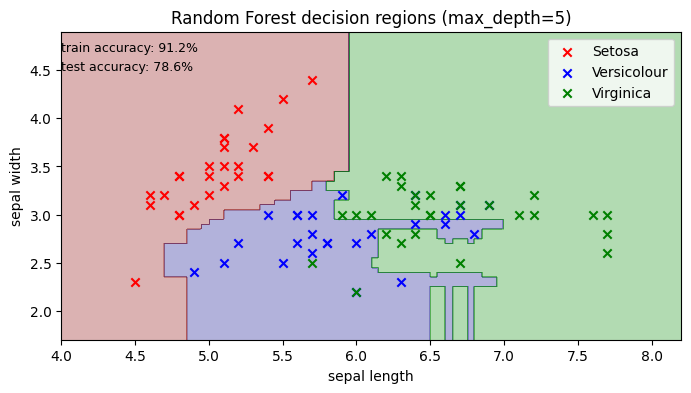

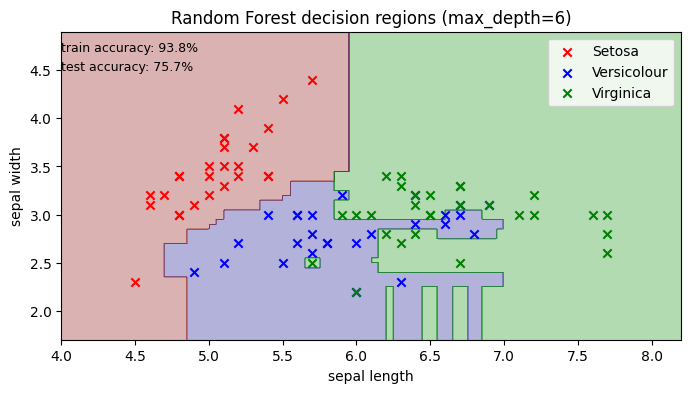

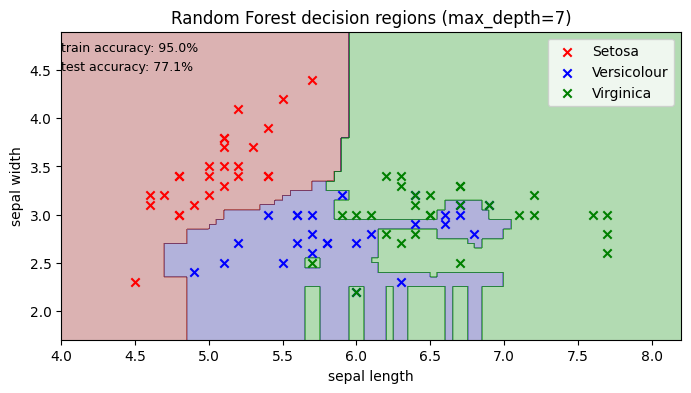

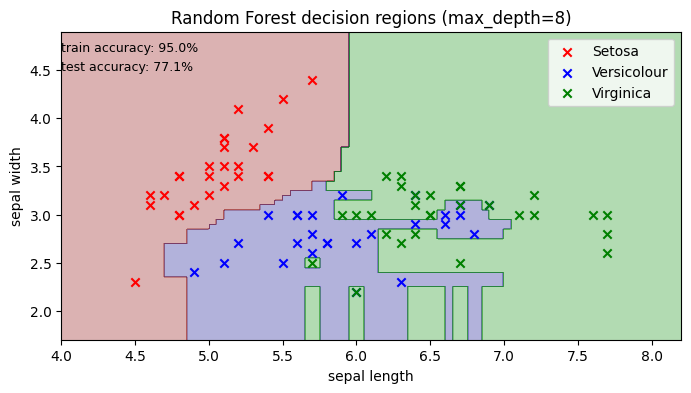

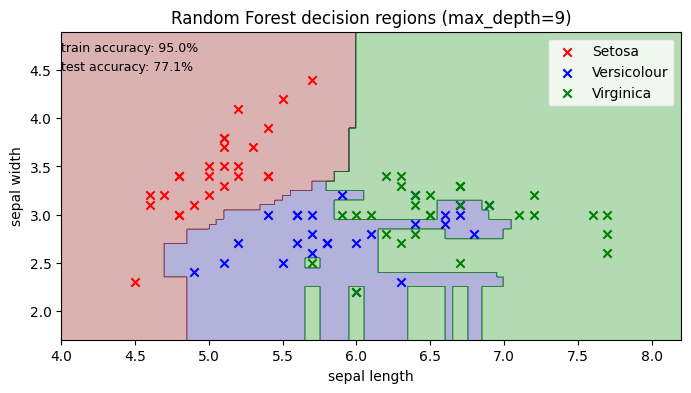

In [34]:
# Your code here. Aim for 9-12 lines.
for depth in range(1, 10):
    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    fig, ax = plt.subplots(figsize=(8, 4))
    plot_iris_predict(clf, ax)
    plot_iris_data(X_train, y_train, f'Random Forest (max_depth={depth})')

    plt.text(4, 4.7, f"train accuracy: {100*train_accuracy:.1f}%", fontsize=9)
    plt.text(4, 4.5, f"test accuracy: {100*test_accuracy:.1f}%", fontsize=9)
    plt.title(f'Random Forest decision regions (max_depth={depth})')

What happens to the training accuracy as *max_depth* increases? What is the maximum test accuracy of a random forest classifier on this data set?

<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.5 &mdash; Evaluate training and test accuracy across two hyperparameters

The performance of *RandomForestClassifier* depends on many hyperparameters. Here you'll perform a sweep over *max_depth* (as you did in Exercise 2.4) and also *n_estimators* (as you did in Exercise 1.4). Instead of plotting the decisions in input space, you'll plot a heatmap of the accuracy for each parameter setting.

You must evaluate the training and test accuracy of *RandomForestClassifier* for every combination of
* *max_depth* $\in \{1, 2, 3, 4, 5, 6, 7, 8, 9\}$
* *n_estimators* $ \in \{1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024\}$

The results should be compiled into a two-dimensional ndarray and plotted as a heatmap with properly labeled axes. Your training accuracy plot should look like this:


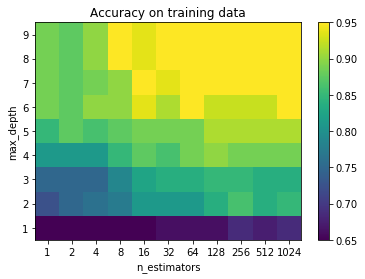

**Write code** to evaluate the training and testing accuracy for all the above combinations. Since training many models may take a few seconds, the plotting should be done in a subsequent code cell, without having to re-run the experiment.

*Tip:* If you build a $9 \times 11$ array of accuracies and plot them using Matplotlib's *imshow* function, Matplotlib does not know which values of *max_depth* each row $0,\ldots,8$ corresponds to, nor does it know which value of *n_estimators* each column $0,\ldots,10$ corresponds to. You can specify the values to use via the **[xticks](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html)** function, where for example `plt.xticks([0,1,2], [10,20,40])` would cause Matplotlib to display labels *10, 20, 40* at the $x$-axis positions, instead of its default "guess" of displaying *0, 1, 2*.

In [35]:
%%time
# Your training and evaluation code here. Aim for 8-12 lines.
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9]
n_estimators_list = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

train_accuracies = np.zeros((len(max_depths), len(n_estimators_list)))
test_accuracies = np.zeros_like(train_accuracies)

# Perform the hyperparameter sweep
for i, depth in enumerate(max_depths):
    for j, n_estimators in enumerate(n_estimators_list):
        clf = sklearn.ensemble.RandomForestClassifier(max_depth=depth, n_estimators=n_estimators, random_state=0)
        clf.fit(X_train, y_train)

        train_accuracies[i, j] = sklearn.metrics.accuracy_score(y_train, clf.predict(X_train))
        test_accuracies[i, j] = sklearn.metrics.accuracy_score(y_test, clf.predict(X_test))

CPU times: user 34.1 s, sys: 174 ms, total: 34.2 s
Wall time: 36.2 s


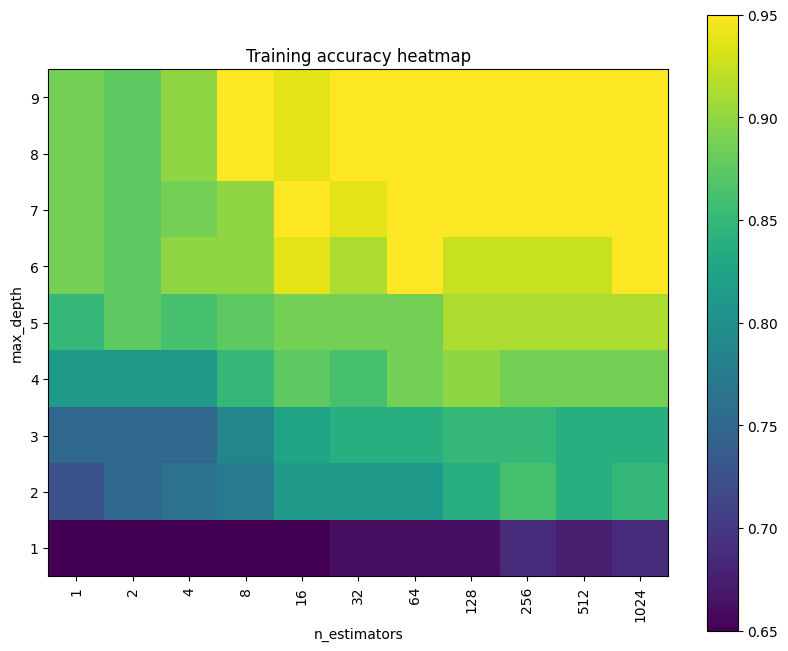

In [38]:
# Your plotting code here. Aim for 8-10 lines.
plt.figure(figsize=(10, 8))
plt.imshow(train_accuracies, interpolation='nearest', cmap='viridis')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()

plt.xticks(np.arange(len(n_estimators_list)), n_estimators_list, rotation=90)
plt.yticks(np.arange(len(max_depths)), max_depths)
plt.gca().invert_yaxis()
plt.title('Training accuracy heatmap');

For what combination(s) of (*max_depth*, *n_estimators*) does the random forest classifier have highest accuracy **on the test data**? Is the accuracy trend on the test data different than the trend on the training data?